In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
w_data = pd.read_csv('~/Desktop/311/seperate data/gsom_seasonal.csv')

In [3]:
w_data.head()

date datatype  LA GUARDIA AIRPORT, NY US  \
0  2003-12-01     AWND                        5.8   
1  2003-12-01     EMNT                      -12.8   
2  2003-12-01     EMSD                      216.0   
3  2003-12-01     EMSN                       72.5   
4  2003-12-01     EMXP                       26.3   

   NY CITY CENTRAL PARK, NY US  JFK INTERNATIONAL AIRPORT, NY US  
0                         3.75                              6.10  
1                       -13.30                            -13.60  
2                       241.50                            177.50  
3                        85.00                             52.50  
4                        27.30                             24.65

In [4]:
tb = pd.pivot_table(w_data, index=["date", "datatype"])

tb.mean(axis=1).unstack("datatype").head()

datatype        AWND       EMNT        EMSD        EMSN       EMXP       EMXT  \
date                                                                            
2003-12-01  5.216667 -13.233333  211.666667   70.000000  26.083333  14.250000   
2004-03-01  4.422222   0.244444   34.000000   35.555556  31.588889  26.055556   
2004-06-01  3.633333  15.166667    0.000000    0.000000  51.977778  32.044444   
2004-09-01  3.822222   5.377778    0.000000    0.000000  46.155556  24.566667   
2004-12-01  4.666667 -11.666667  175.000000  123.333333  23.222222  15.244444   

datatype          PRCP        SNOW       TAVG       TMAX       TMIN  
date                                                                 
2003-12-01   57.050000  214.833333  -1.116667   2.533333  -4.800000  
2004-03-01  107.644444   52.444444  11.855556  16.300000   7.422222  
2004-06-01  130.455556    0.000000  23.055556  26.777778  19.344444  
2004-09-01  127.711111    0.000000  14.622222  18.222222  11.033333  
2004-12-01   87.477778  266.666667   1.611111   5.077778  -1.833333

In [5]:
myfantasticcorrelation = tb.mean(axis=1).unstack("datatype").corr()
myfantasticcorrelation

datatype      AWND      EMNT      EMSD      EMSN      EMXP      EMXT  \
datatype                                                               
AWND      1.000000 -0.910903  0.649061  0.620310 -0.232373 -0.859125   
EMNT     -0.910903  1.000000 -0.699523 -0.697483  0.288977  0.948313   
EMSD      0.649061 -0.699523  1.000000  0.900005 -0.182038 -0.714548   
EMSN      0.620310 -0.697483  0.900005  1.000000 -0.180931 -0.703914   
EMXP     -0.232373  0.288977 -0.182038 -0.180931  1.000000  0.312547   
EMXT     -0.859125  0.948313 -0.714548 -0.703914  0.312547  1.000000   
PRCP     -0.213732  0.262268 -0.102930 -0.067579  0.837219  0.256509   
SNOW      0.653369 -0.725779  0.953019  0.923855 -0.202662 -0.753323   
TAVG     -0.918114  0.992561 -0.713861 -0.694898  0.289732  0.967916   
TMAX     -0.912129  0.989831 -0.718312 -0.701700  0.295892  0.975009   
TMIN     -0.922279  0.993272 -0.707774 -0.686151  0.282501  0.958470   

datatype      PRCP      SNOW      TAVG      TMAX      TMIN  
datatype                                                    
AWND     -0.213732  0.653369 -0.918114 -0.912129 -0.922279  
EMNT      0.262268 -0.725779  0.992561  0.989831  0.993272  
EMSD     -0.102930  0.953019 -0.713861 -0.718312 -0.707774  
EMSN     -0.067579  0.923855 -0.694898 -0.701700 -0.686151  
EMXP      0.837219 -0.202662  0.289732  0.295892  0.282501  
EMXT      0.256509 -0.753323  0.967916  0.975009  0.958470  
PRCP      1.000000 -0.084190  0.260036  0.256869  0.263087  
SNOW     -0.084190  1.000000 -0.741075 -0.747830 -0.732486  
TAVG      0.260036 -0.741075  1.000000  0.999006  0.998903  
TMAX      0.256869 -0.747830  0.999006  1.000000  0.995826  
TMIN      0.263087 -0.732486  0.998903  0.995826  1.000000

In [6]:
def graphCorr(corr, title):
    labels = corr.columns.values
    ticks = range(labels.shape[0])

    plum, axe = plt.subplots(figsize=(10,10))

    im=axe.imshow(corr.values, vmin=-1, vmax=1, cmap="RdBu")
    axe.set(xticks=ticks,yticks=ticks)
    axe.set_xticklabels(labels,rotation=90,fontsize=14)
    axe.set_yticklabels(labels,fontsize=14)

    plum.colorbar(im)
    plum.show()
    plum.suptitle(title)

/Users/jackhedaya/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


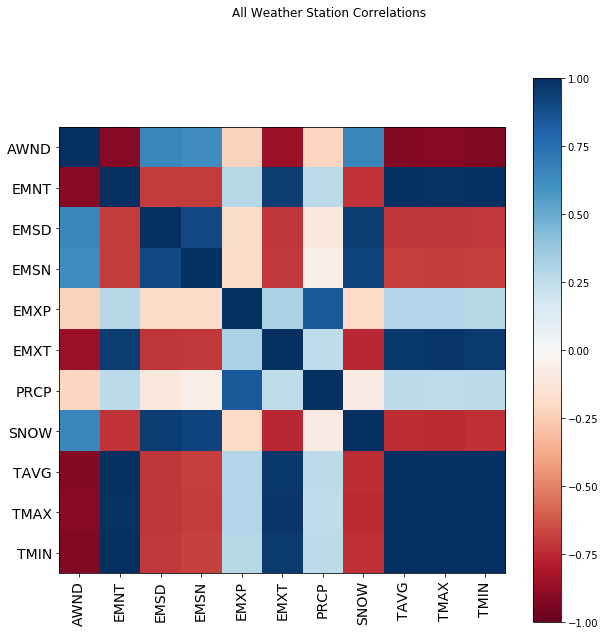

In [7]:
graphCorr(myfantasticcorrelation, "All Weather Station Correlations")

In [8]:
table=w_data.pivot_table(index=['date','datatype'])
table.head()

JFK INTERNATIONAL AIRPORT, NY US  \
date       datatype                                     
2003-12-01 AWND                                  6.10   
           EMNT                                -13.60   
           EMSD                                177.50   
           EMSN                                 52.50   
           EMXP                                 24.65   

                     LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  
date       datatype                                                          
2003-12-01 AWND                            5.8                         3.75  
           EMNT                          -12.8                       -13.30  
           EMSD                          216.0                       241.50  
           EMSN                           72.5                        85.00  
           EMXP                           26.3                        27.30

In [9]:
tb2 = table.copy()
tb3 = table.copy()
tb4 = table.copy()

In [ ]:
tb2.pop('LA GUARDIA AIRPORT, NY US')
myterriblecorrelation = tb2.sum(axis=1).unstack("datatype").corr()

In [ ]:
graphCorr(myfantasticcorrelation, 'JFK and Central Park Weather Station Correlations')

In [21]:
tb3.pop('JFK INTERNATIONAL AIRPORT, NY US')
tb3.head()

LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US
date       datatype                                                        
2003-12-01 AWND                            5.8                         3.75
           EMNT                          -12.8                       -13.30
           EMSD                          216.0                       241.50
           EMSN                           72.5                        85.00
           EMXP                           26.3                        27.30

In [22]:
myterriblecorrelation = tb3.sum(axis=1).unstack("datatype").corr()

In [ ]:
myterriblecorrelation.head()

In [ ]:
graphCorr(myfantasticcorrelation, 'La Guardia and Central Park Weather Station Correlations')

In [ ]:
tb4.pop('NY CITY CENTRAL PARK, NY US')
tb4.head()

In [ ]:
myterriblecorrelation = tb4.sum(axis=1).unstack("datatype").corr()

In [ ]:
myterriblecorrelation.head()

In [ ]:
graphCorr(myfantasticcorrelation, 'JFK and La Guardia Weather Station Correlations')

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<iframe src="http://worldsbiggestpacman.com/play/#-283,-78" width="990" height="615" scrolling="no" style="position: absolute; left: -239px; top: -55px;"></iframe>'))

In [13]:
tb2 = tb.unstack()

In [14]:
tb2.keys()

MultiIndex(levels=[['JFK INTERNATIONAL AIRPORT, NY US', 'LA GUARDIA AIRPORT, NY US', 'NY CITY CENTRAL PARK, NY US'], ['AWND', 'EMNT', 'EMSD', 'EMSN', 'EMXP', 'EMXT', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
           names=[None, 'datatype'])

In [18]:
jfk = tb2['JFK INTERNATIONAL AIRPORT, NY US']
lag = tb2['LA GUARDIA AIRPORT, NY US']
cp = tb2['NY CITY CENTRAL PARK, NY US']

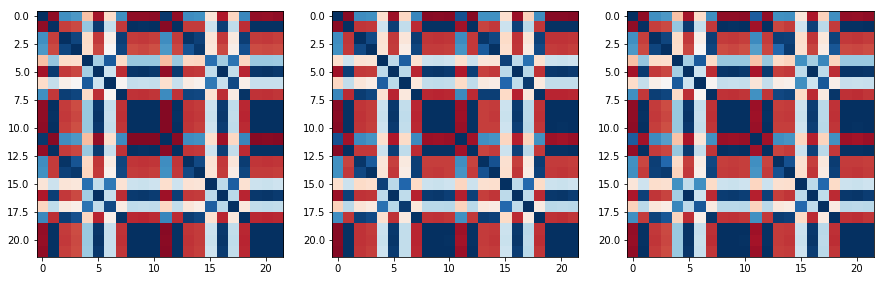

In [45]:
fig, axes = plt.subplots(ncols=3, figsize=(15,15))
axes[0].imshow(np.corrcoef(jfk.T, lag.T), cmap="RdBu", vmin=-1, vmax=1)
axes[1].imshow(np.corrcoef(lag.T, cp.T), cmap="RdBu", vmin=-1, vmax=1)
axes[2].imshow(np.corrcoef(jfk.T, cp.T), cmap="RdBu", vmin=-1, vmax=1)

In [38]:
def graphCorr(set1, set2, title='Correlation'):
    x = np.corrcoef(set1.T, set2.T)
    plt.title(title)
    plt.imshow(x, cmap="RdBu", vmin=-1, vmax=1)
    plt.colorbar()

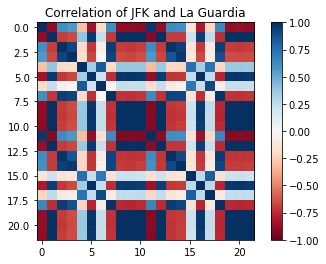

In [39]:
graphCorr(jfk, lag, title='Correlation of JFK and La Guardia')

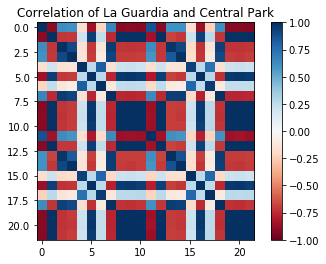

In [40]:
graphCorr(lag, cp, title='Correlation of La Guardia and Central Park')